In [1]:
#PART A
#PART A 1A
#importing the important packages


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore

#reading the csv file.

Data1 = pd.read_csv("Car name.csv")
Data1
   

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


In [2]:
Data1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [3]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [4]:
#Part A 1B

CarDetails = pd.read_json("CarAttributes.json")
CarDetails

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [5]:
CarDetails.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
CarDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [7]:
#Part A 1C
#Mergiing the 2 dataframes

CarInfo = pd.concat([Data1,CarDetails], axis=1)
CarInfo

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [8]:
#PART A 1D

CarInfo.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
CarInfo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


<AxesSubplot:>

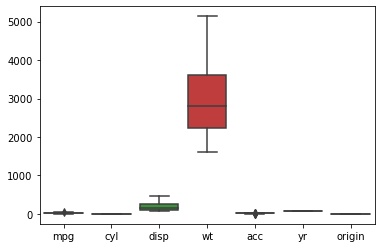

In [10]:
sns.boxplot(data=CarInfo)

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cyl'}>,
        <AxesSubplot:title={'center':'disp'}>],
       [<AxesSubplot:title={'center':'wt'}>,
        <AxesSubplot:title={'center':'acc'}>,
        <AxesSubplot:title={'center':'yr'}>],
       [<AxesSubplot:title={'center':'origin'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

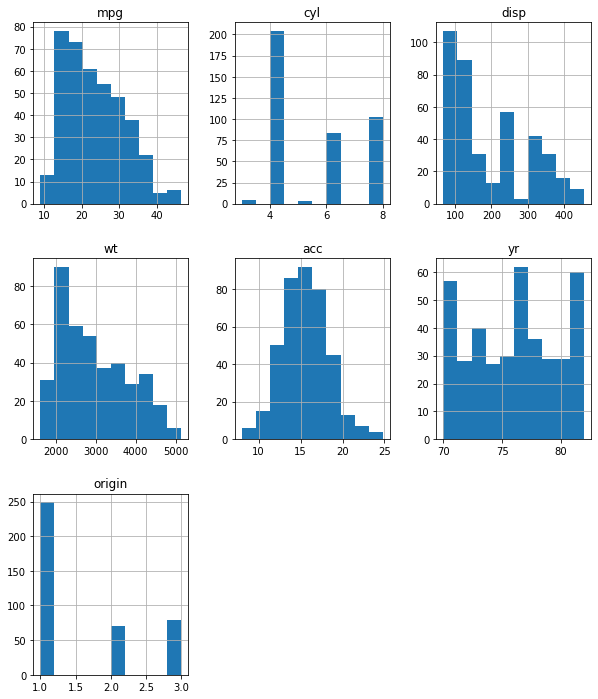

In [11]:
CarInfo.hist(figsize=(10,12))

In [12]:
#Observations:
#1. Here, in the attribute mpg that is mileage per gallon is showing that mean is similar to median, however
# and mpg shows there is big difference between the minimum mileage and maximum mileage values.
#2. Similarly the attribute cyl has much difference between the maximum cylinders and minimum cylinders of the cars.
#3. In the above histogram, we can see that the attribute disp has the mean > median and clearly states that it is right
# skewed.
#4. In the attribute wt, there are more than 40% values are in the Quartile Q3 that is present in 75% range & right skewed.
#5. The attribute acc have the mean and median are almost similar, therefore here the disbtribution of the datapoints 
# are symmetrical.



In [13]:
#PARTA 2A
#Checking for the missing values
#Printing featurewise percentage of null values in the dataframe

CarInfo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [14]:
CarInfo.isnull()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [15]:
CarInfo.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [16]:
nullvalues_per = CarInfo.isnull().sum() * 100 / len(CarInfo)
print(nullvalues_per)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


In [17]:
#PARTA 2B
#Checking duplicate values in the dataframe

duplicate = CarInfo[CarInfo.duplicated()]
print("Duplicate Rows:")
#print the resultant dataframe
duplicate

Duplicate Rows:


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


In [18]:
CarInfo.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Length: 398, dtype: bool

In [19]:
CarInfo.duplicated().sum()

0

In [20]:
#Here, we have checked through different functions for the duplicate rows, however there are no duplicate values in 
#the dataframe


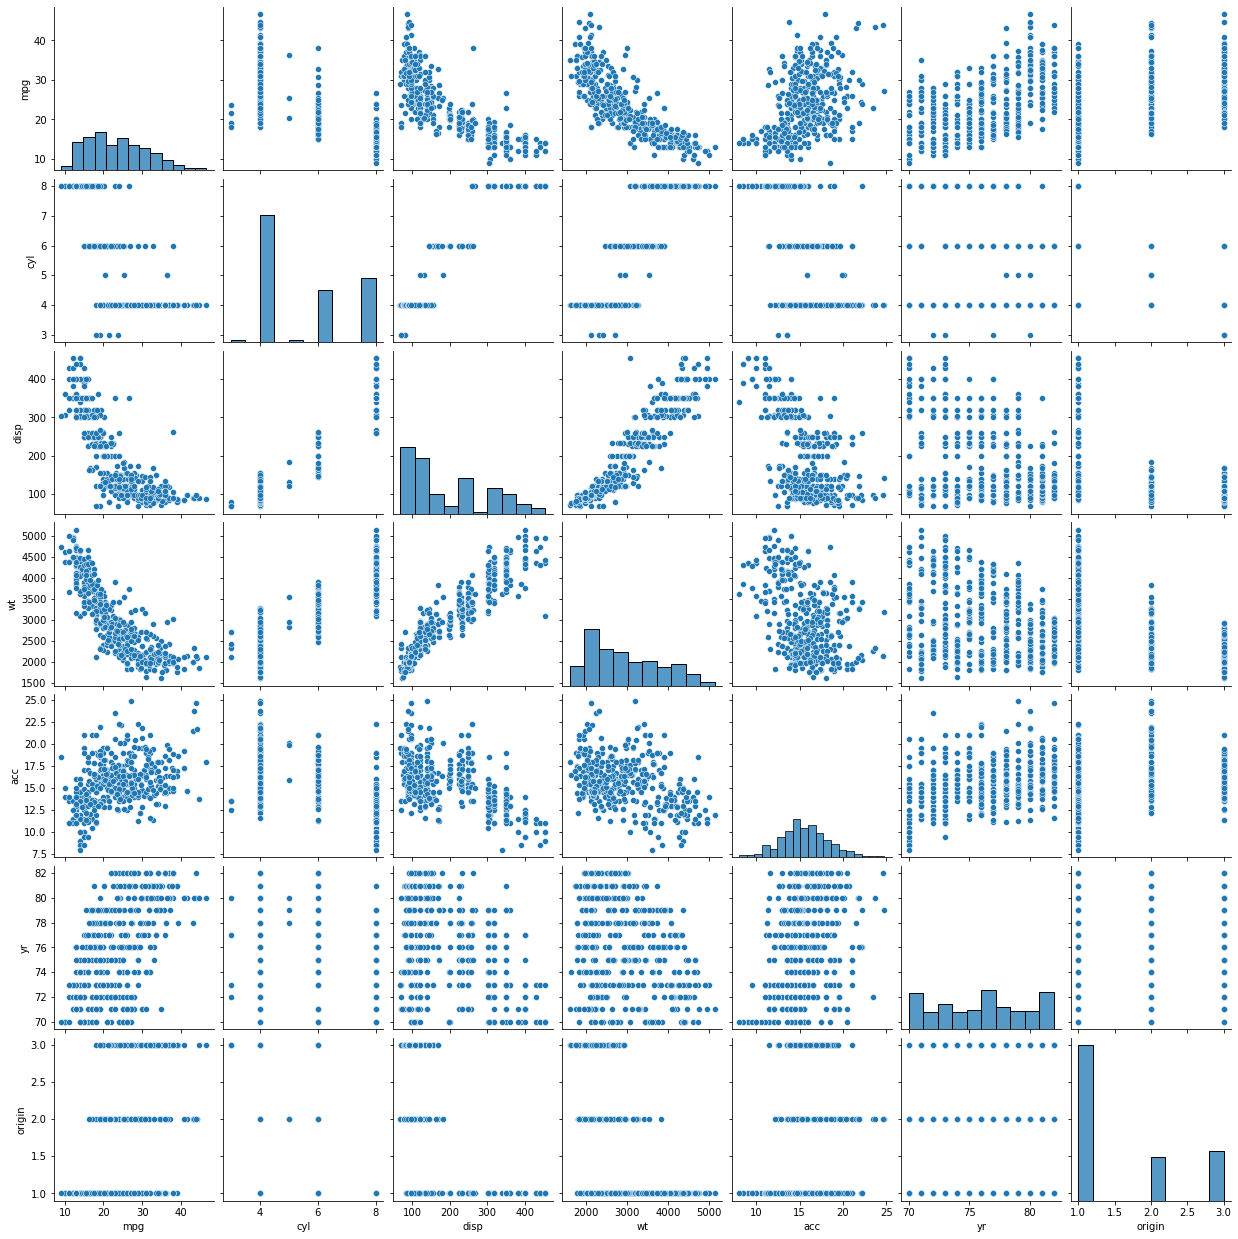

In [21]:
#PARTA 2C
sns.pairplot(CarInfo)

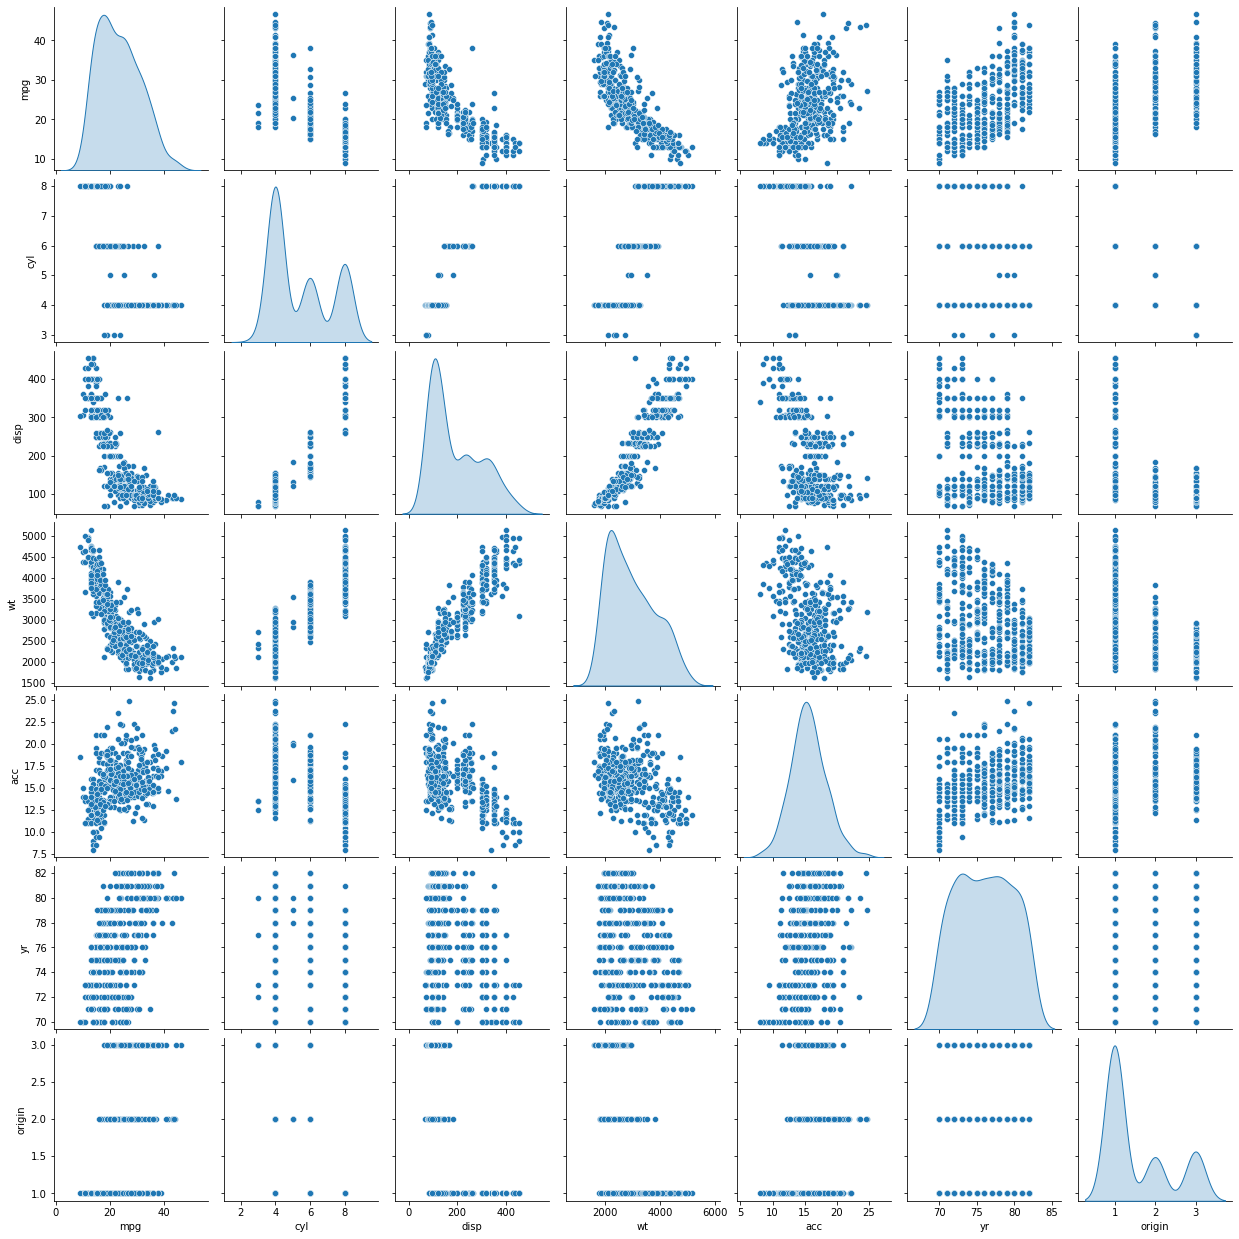

In [22]:
CarInfo.reset_index(drop=True, inplace=True)
sns.pairplot(CarInfo, diag_kind="kde")

<AxesSubplot:xlabel='wt', ylabel='disp'>

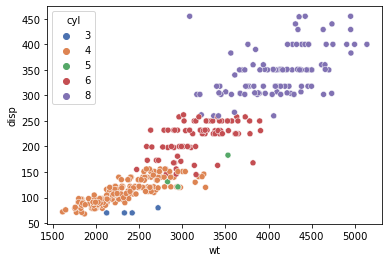

In [23]:
#PARTA 2D
#Scatter Plot

sns.scatterplot(data=CarInfo,x="wt",y="disp",hue="cyl",palette="deep")

In [24]:
#PARTA 2E
#insights from the above scatter plot

#the relationship between the two variables wt and disp shows linear distribution.
#The cars with the weights below 3500 unit are having majorly 4 cylinders in it.
#The cars with disp units more than 250 are having majorly 8 cylinders.
#There are some exceptions here like there are cars having 3 cylinders are very few and there disp unit ranges below 100.
#Another insight we can see here that the cars having 5 cylinders with the color green are few close to 3 in numbers.

<AxesSubplot:xlabel='wt', ylabel='mpg'>

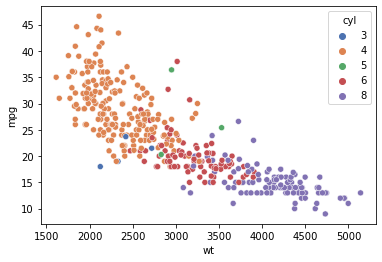

In [25]:
#PARTA 2F
#Scatter plot for wt and mpg.

sns.scatterplot(data=CarInfo, x="wt", y="mpg", hue="cyl", palette="deep")


In [26]:
#PARTA 2G
#Here above we can state that as the weight(wt) of the car increases the mileage(mpg) decreases.
#The cars with the maximum weights are having 8 number of cylinders which is here denoted by violet color.
#The cars with the 4 number of cylinders are having more mileage.
#There are some outliers here, like car with 6 cylinders denoted by a single red dot(datapoint) have mileage
# more than 35 units(mpg) and else most of the cars with 6 cylinders have weights more than 2500 units(wt) & mileage less
# than 25 units(mpg).

In [27]:
#PARTA 2H
#Checking for unexpected values in all features & datapoints.
CarInfo.head(5)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [28]:
CarInfo.tail(5)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1
397,chevy s-10,31.0,4,119.0,82,2720,19.4,82,1


In [29]:
CarInfo.head(10)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
5,ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
6,chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
7,plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
8,pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1
9,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1


In [30]:
CarInfo.tail(10)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
388,chrysler lebaron medallion,26.0,4,156.0,92,2585,14.5,82,1
389,ford granada l,22.0,6,232.0,112,2835,14.7,82,1
390,toyota celica gt,32.0,4,144.0,96,2665,13.9,82,3
391,dodge charger 2.2,36.0,4,135.0,84,2370,13.0,82,1
392,chevrolet camaro,27.0,4,151.0,90,2950,17.3,82,1
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1
397,chevy s-10,31.0,4,119.0,82,2720,19.4,82,1


In [31]:
CarInfo.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [32]:
CarInfo.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

<AxesSubplot:title={'center':'hp'}>

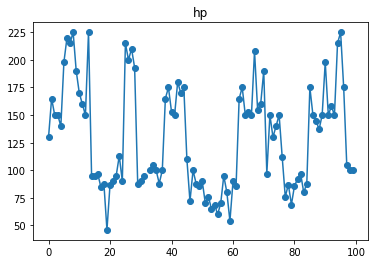

In [33]:
#Here after tracking the unexpected values as mentioned "?" in the hint in the questions section,
#coerce the invalid values to NaN using errors keyword argument.
CarInfo["hp"] = pd.to_numeric(CarInfo["hp"], errors='coerce')

#Then chekcing the distribution of the values in the hp attribute or column in the scale from 0 to 225
CarInfo['hp'][:100].plot(title="hp", marker="o")



In [34]:
#Checking the skewness of the hp attribute and we find below that it is right skewed, so it will be good that we replace
#the NaN values with the medians.
CarInfo["hp"].skew()

1.0873262824048695

array([[<AxesSubplot:title={'center':'hp'}>]], dtype=object)

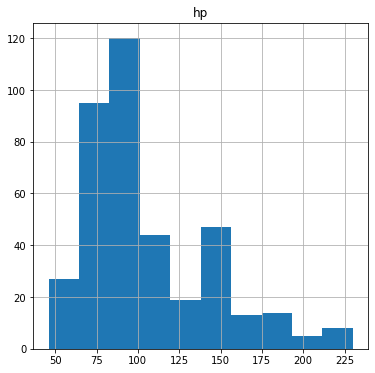

In [35]:
CarInfo.hist(["hp"],figsize=(6,6))


In [36]:
#replacting with medians for NaN values in the hp attribute.
CarInfo['hp']=CarInfo['hp'].fillna(CarInfo['hp'].median())
CarInfo['hp']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: hp, Length: 398, dtype: float64

In [37]:
CarInfo['hp'].mean()

104.30402010050251

In [38]:
CarInfo['hp'].isna().sum()

0

In [39]:
CarInfo['hp'].isnull().sum()

0

In [40]:
#PARTA 3A
#Applying K-Means clustering.

CarInfo.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [41]:
CarInfo.origin.unique()

array([1, 3, 2], dtype=int64)

In [42]:
CarInfo.nunique()

car_name    305
mpg         129
cyl           5
disp         82
hp           94
wt          351
acc          95
yr           13
origin        3
dtype: int64

In [43]:
CarInfo.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [44]:
one_hot_encoded_CarInfo = pd.get_dummies(CarInfo, columns = ['origin'])
one_hot_encoded_CarInfo

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [45]:
#New dataframe is being created after dropping the attribute car_name having the object datatype.
CarInfo_UpdatedData = one_hot_encoded_CarInfo.drop(['car_name'], axis=1)
CarInfo_UpdatedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin_1  398 non-null    uint8  
 8   origin_2  398 non-null    uint8  
 9   origin_3  398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


In [46]:
numeric_columns = CarInfo_UpdatedData.select_dtypes(include=[np.float64, np.int64]).columns
print(numeric_columns)

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr'], dtype='object')


In [47]:
CarInfo_UpdatedData[numeric_columns] = CarInfo_UpdatedData[numeric_columns].apply(zscore)
CarInfo_UpdatedData

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,1,0,0
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,1,0,0
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,1,0,0
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,1,0,0
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,1,0,0
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0,1,0
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,1,0,0
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,1,0,0


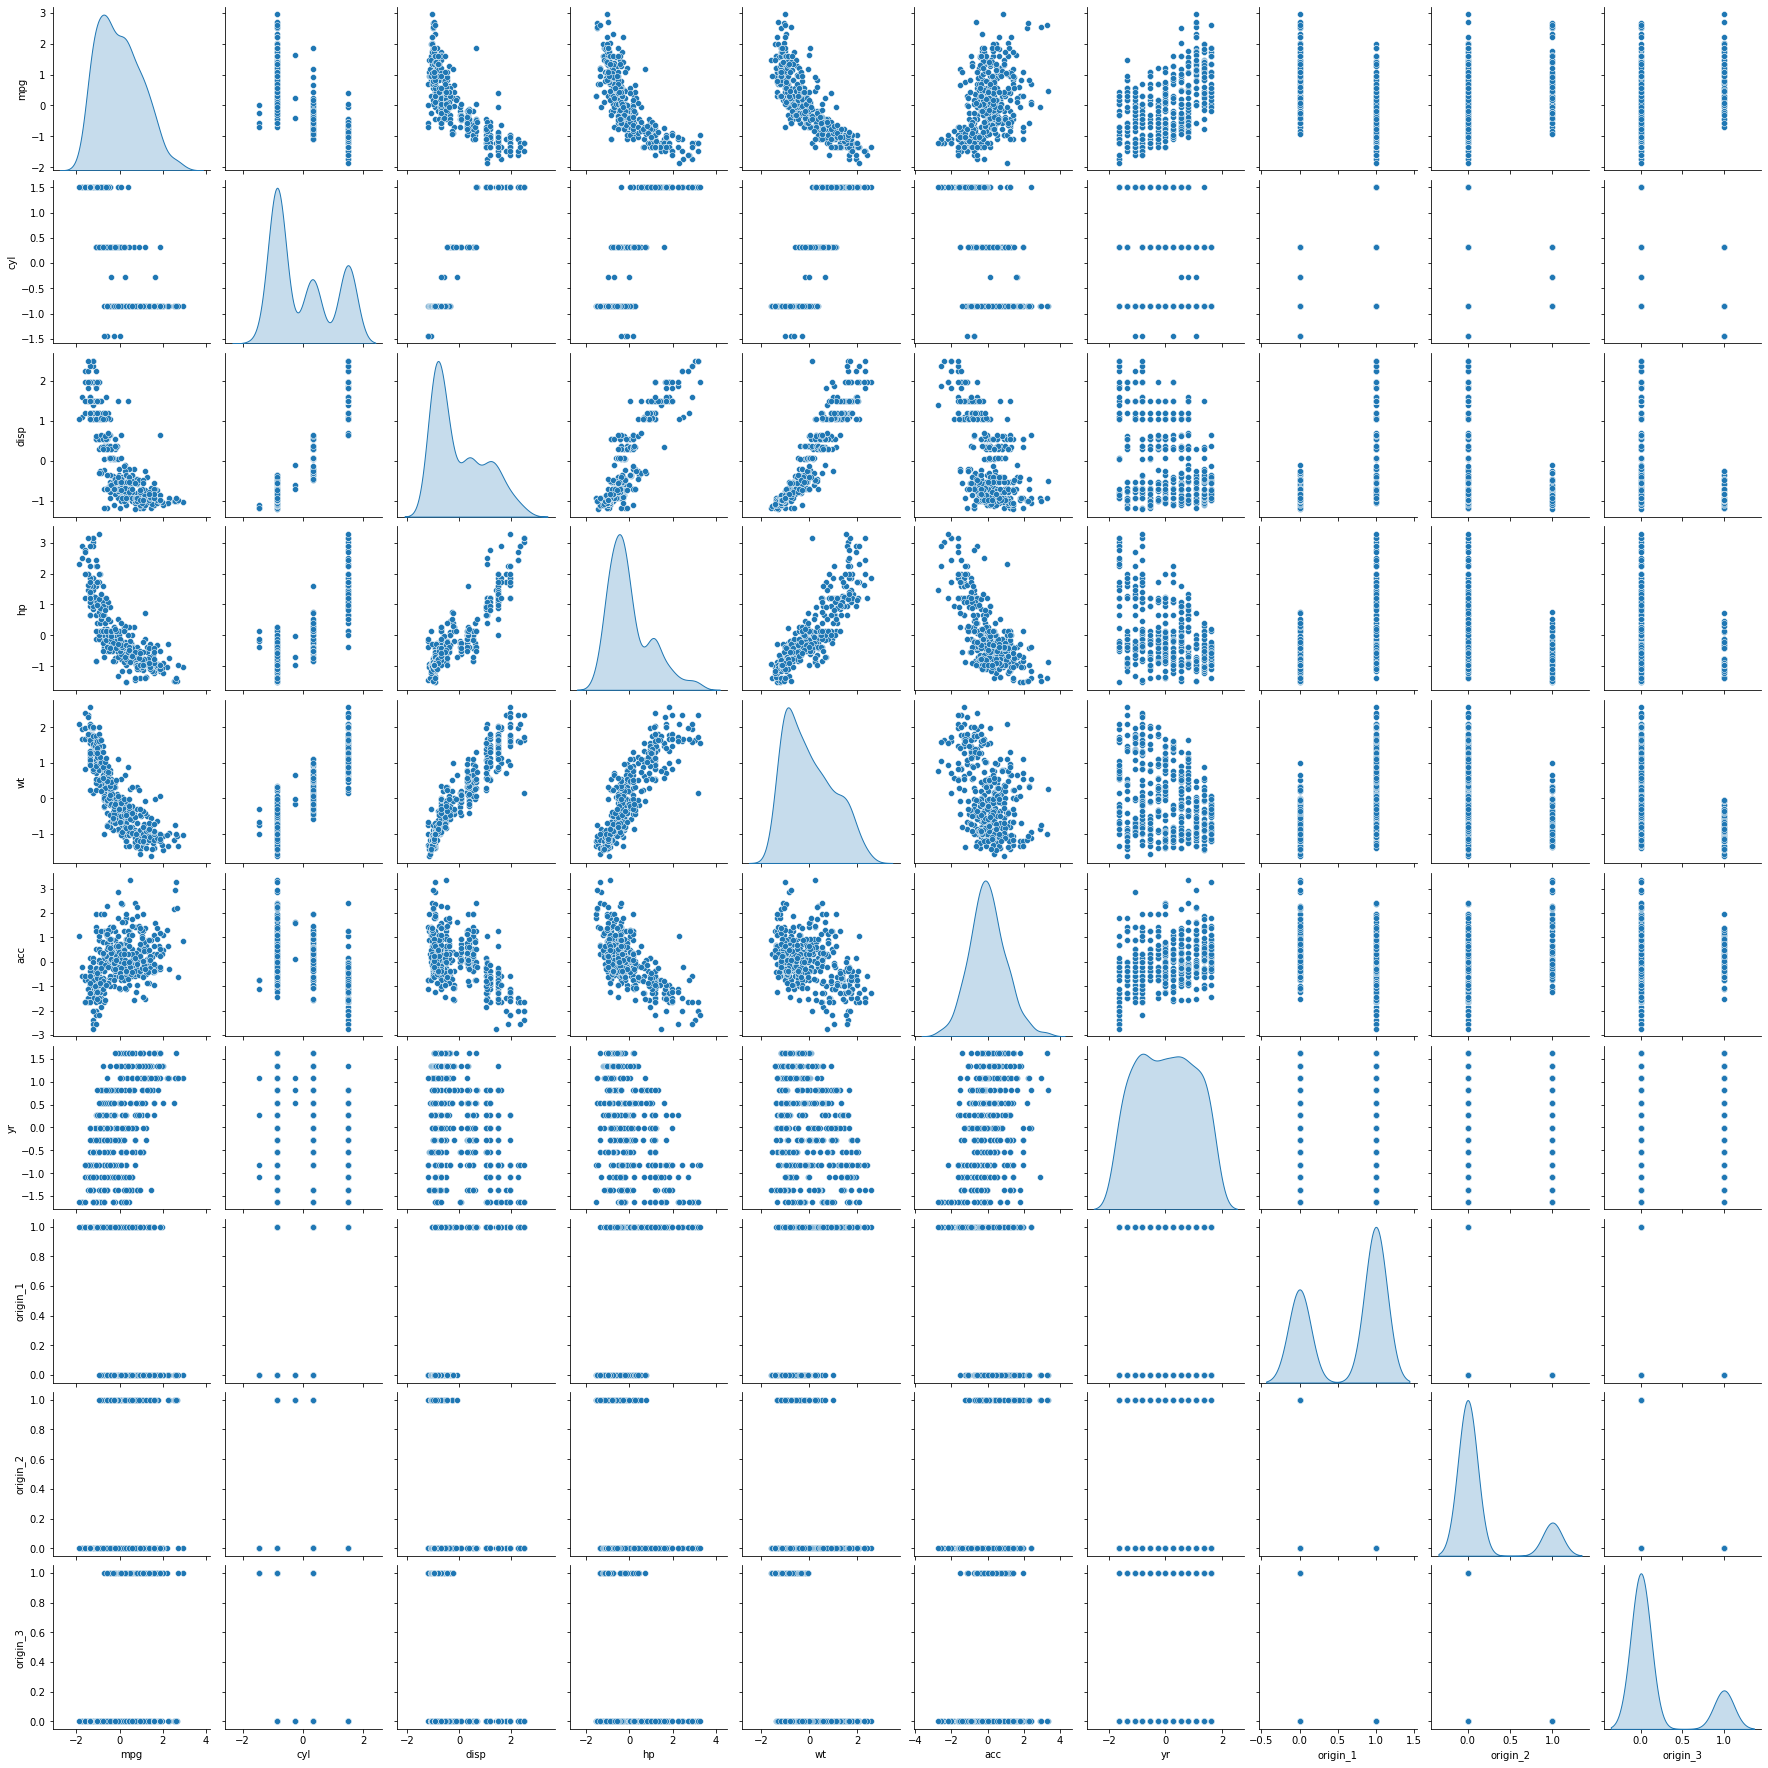

In [48]:
# checking the distribution using the pairplot.
sns.pairplot(CarInfo_UpdatedData, diag_kind="kde")

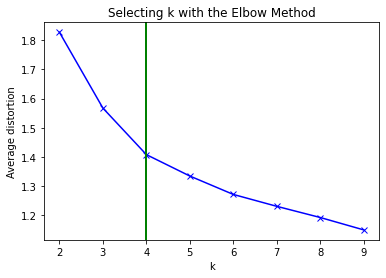

In [49]:
#PARTA 3A

#Next will try to find the correct number of clusters, that is value of K.

from scipy.spatial.distance import cdist

clusters = range(2,10)
meanDistortions=[]


for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(CarInfo_UpdatedData)
    prediction=model.predict(CarInfo_UpdatedData)
    meanDistortions.append(sum(np.min(cdist(CarInfo_UpdatedData, model.cluster_centers_, 'euclidean'), axis=1)) / CarInfo_UpdatedData.shape[0])
    
    
#PARTA 3B
#Plotting the visual and finding below the appropriate elbow point.

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

#PARTA 3C
#Highlighting the possible elbow point
plt.axvline([4],linewidth=2, color='g')


In [50]:
#PARTA 3D
#Here we can see that the bend can be seen on the k=4 point.
#Here we will check with k-4.

final_model = KMeans(4)
final_model.fit(CarInfo_UpdatedData)
prediction = final_model.predict(CarInfo_UpdatedData)


In [51]:
#PARTA 3E

CarInfo_UpdatedData["GROUP"] = prediction
print("Groups Assigned : ")
CarInfo_UpdatedData



Groups Assigned : 


,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3,GROUP
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,1,0,0,2
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,1,0,0,2
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,1,0,0,2
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,1,0,0,2
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,1,0,0,1
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0,1,0,1
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,1,0,0,1
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,1,0,0,1


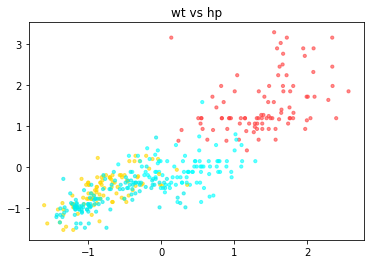

In [52]:
#PART 3F
#plotting the datapoints based upon clusters.

centroids = final_model.cluster_centers_
centre_x = [i[0] for i in centroids]
centre_y = [i[1] for i in centroids]

#creating the new dataframe and copying to the updated dataframe

df = CarInfo_UpdatedData

df['centre_x'] = df.GROUP.map({0:centre_x[0], 1:centre_x[1], 2:centre_x[2], 3:centre_x[3]})
df['centre_y'] = df.GROUP.map({0:centre_y[0], 1:centre_y[1], 2:centre_y[2], 3:centre_y[3]})

colors = ['#00FFFF', '#00EEEE', '#FF4040', '#FFD700']
df['c'] = df.GROUP.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

#Here choosing the two variables that is wt and hp.
plt.scatter(df.wt, df.hp, c=df.c, alpha=0.6, s=10)
plt.title("wt vs hp")
plt.show()



In [53]:
#PARTA 3G
#importing new json file.

df1 = pd.read_json("AppendData.json")
df1


,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3
0,21,10,311,145,3411,12,71,1,0,0
1,25,8,350,165,3543,13,70,0,1,0
2,18,8,318,150,3436,11,70,0,0,1


In [54]:
NewPrediction = final_model.predict(df1)
df1["GROUP"] = NewPrediction
print("Groups Assigned: \n")
df1

Groups Assigned: 



,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3,GROUP
0,21,10,311,145,3411,12,71,1,0,0,2
1,25,8,350,165,3543,13,70,0,1,0,2
2,18,8,318,150,3436,11,70,0,0,1,2


In [55]:
#Here we can see it belongs to Group 2 that is cluster number 2.


In [56]:
#PARTB 1A

dframe1 = pd.read_csv("vehicle.csv")
dframe1

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [57]:
#PARTB 1B

dframe1.shape

(846, 19)

In [58]:
dframe1.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [59]:
dframe1.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [60]:
dframe1["class"].unique()

array(['van', 'car', 'bus'], dtype=object)

In [61]:
#Here above we can see that there are 3 types of classes present whose information is available in the data.


In [62]:
dframe1.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [63]:
dframe1.tail()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car
845,85,36.0,66.0,123.0,55.0,5,120.0,56.0,17.0,128,140.0,212.0,131.0,73.0,1.0,18.0,186.0,190,van


In [64]:
#checking for missing values.

dframe1.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [65]:
#checking featurewise missing values.

per_nullvalues = dframe1.isnull().sum() * 100 / len(dframe1)
print(per_nullvalues)

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


In [66]:
dframe1.skew()

C:\Users\amitr\AppData\Local\Temp/ipykernel_23632/73240534.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dframe1.skew()


compactness                    0.381271
circularity                    0.261809
distance_circularity           0.106585
radius_ratio                   0.394978
pr.axis_aspect_ratio           3.830362
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607271
elongatedness                  0.047847
pr.axis_rectangularity         0.770889
max.length_rectangularity      0.256359
scaled_variance                0.651598
scaled_variance.1              0.842034
scaled_radius_of_gyration      0.279317
scaled_radius_of_gyration.1    2.083496
skewness_about                 0.776519
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.226341
dtype: float64

In [67]:
#imputting missing values with median
#importing the required library

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median', missing_values=np.nan)
columns1 = dframe1.columns[:18]
dframe1.iloc[:,:18] = imputer.fit_transform(dframe1.iloc[:,:18])
dframe1.iloc[:,:18] = pd.DataFrame(dframe1.iloc[:,:18], columns=columns1)

#checking for null values after imputting with median values
null_afterimputing = dframe1.isnull().sum() * 100 / len(dframe1)
null_afterimputing

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64

In [68]:
isna_afterimputing = dframe1.isna().sum() * 100 / len(dframe1)
isna_afterimputing

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64

In [69]:
#here above we can see there are no null or nan values after successful imputation

In [70]:
#PARTB 1C
#Pie chart and percentage of values for variable 'class'.

#checking for unique values in class variable.

dframe1['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

In [71]:
#Here it can be derived from the above output that there are 3 types of values in class variable.
# That is van, car and bus.
#deriving the percentage of the values in the variable class.

dframe1['class'].value_counts() * 100 / len(dframe1)

car    50.709220
bus    25.768322
van    23.522459
Name: class, dtype: float64

array([<AxesSubplot:ylabel='class'>], dtype=object)

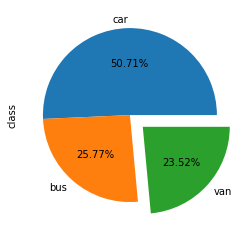

In [72]:
data = dframe1['class'].value_counts()

data.plot(kind='pie', subplots=True, autopct='%1.02f%%', explode=(0,0,0.2))

In [73]:
#PARTB 1D
#checking for duplicate rows in the dataframe

dframe1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
841    False
842    False
843    False
844    False
845    False
Length: 846, dtype: bool

In [74]:
dframe1.duplicated().any()

False

In [75]:
#Here above it is observed that above function is returning false while checking for any duplicate rows in all of the rows.

#Therefore printing the entire columns of the dataframe.

print(dframe1[dframe1.duplicated()])

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []


In [76]:
#PARTB 2A
#Splitting data into train and test model.
#importing the necessary library.

from sklearn.model_selection import train_test_split

X = dframe1.drop("class", axis=1)
y = dframe1["class"]
X

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0


In [77]:
y

0      van
1      van
2      car
3      van
4      bus
      ... 
841    car
842    van
843    car
844    car
845    van
Name: class, Length: 846, dtype: object

In [78]:
#splitting the data into train and test i.e., X and y in the proportion 75:25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

print("shape of original dataset:", dframe1.shape)
print("shape of input - training set:", X_train.shape)
print("shape of output - training set:", y_train.shape)
print("shape of input testing set:", X_test.shape)
print("shape of output testing set:", y_test.shape)

shape of original dataset: (846, 19)
shape of input - training set: (634, 18)
shape of output - training set: (634,)
shape of input testing set: (212, 18)
shape of output testing set: (212,)


In [79]:
#PARTB 2B
#standardizing the data using StandardScaler function
#importing the necessary library.

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

object = StandardScaler()
X_train.iloc[:,:18] = object.fit_transform(X_train.iloc[:,:18])
X_train
X_test.iloc[:,:18] = object.fit_transform(X_test.iloc[:,:18])
X_test
print("The data is successfully standardardized using the StandardScaler function.")

The data is successfully standardardized using the StandardScaler function.


In [80]:
#PARTB 3A
#train a base classification model using SVM.
#importing necessary libarary

from sklearn.svm import SVC

classfi_model = SVC(kernel="rbf", random_state=1, gamma=0.1, C=1.0)
classfi_model.fit(X_train, y_train)


SVC(gamma=0.1, random_state=1)

In [81]:
#PARTB 3B
#generating classification metrics for train data.
#importing necessary libraries here

from sklearn.metrics import classification_report, confusion_matrix
svm_ytrain = classfi_model.predict(X_train)
print("Classification metrics for train data: \n", classification_report(y_train, svm_ytrain))

Classification metrics for train data: 
               precision    recall  f1-score   support

         bus       0.99      0.99      0.99       163
         car       1.00      0.98      0.99       322
         van       0.96      1.00      0.98       149

    accuracy                           0.99       634
   macro avg       0.98      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



In [82]:
#PARTB 3C
#applying PCA on the data with number of components = 10.
#importing necessary library.

from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca_df = pca.fit_transform(X)
pca_df.shape

(846, 10)

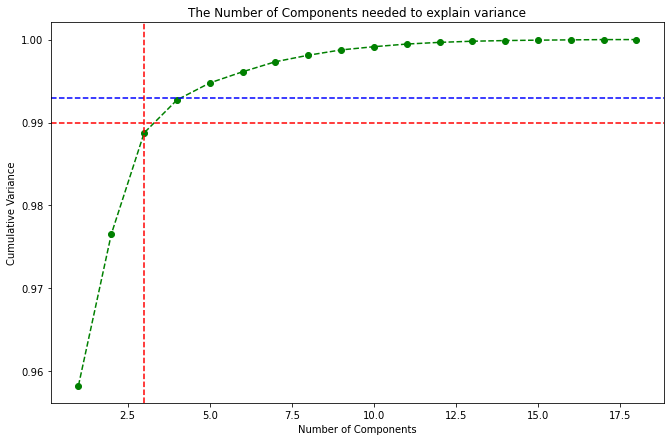

In [83]:
#PARTB 3D
#Cumulative Variance

pca = PCA(n_components=18)

pca_df = pca.fit_transform(X)

variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(1,figsize=(11,7))
plt.ylim(0.0,1.1)

plt.clf()
plt.plot(list(range(1,19)), variance, marker='o',linestyle='--', color='green')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")


plt.title("The Number of Components needed to explain variance")

plt.axhline(y=0.99, color='r', linestyle='--')
plt.axhline(y=0.993, color='b', linestyle='--')

plt.axvline(x=3, color='r', linestyle='--')

plt.show()
#PARTB 3E
# red horizontal present in the figure below to highlight the threshold of 90%.


In [84]:
#PARTB 3F
#selecting minimum component =3 as the cumulative variance shows at 99% mark.

pca_3 = PCA(n_components=3)
pca_3.fit(pca_df)
npca_3 = pca_3.transform(pca_df)
print(pca_3.explained_variance_ratio_)



[0.95828549 0.01824492 0.01221656]


In [85]:
#PARTB 3G
#train SVM model on components selected from above steps.

npca_3_train, npca_3_test, y_train, y_test = train_test_split(npca_3, y, test_size=0.35, random_state=1)

print("shape of original data set: ", pca_df.shape)
print("shape of input training set: ", npca_3_train.shape)
print("shape of output training set: ", y_train.shape)
print("shape of input testing set: ", npca_3_test.shape)
print("shape of output testing set: ", y_test.shape)

shape of original data set:  (846, 18)
shape of input training set:  (549, 3)
shape of output training set:  (549,)
shape of input testing set:  (297, 3)
shape of output testing set:  (297,)


In [86]:
new_m = SVC()
new_m.fit(npca_3_train,y_train)
y_train_predict = new_m.predict(npca_3_train)
y_test_predict = new_m.predict(npca_3_test)

print('SVM - training data accuracy is: ',new_m.score(npca_3_train, y_train))
print('SVM - testing data accuracy is: ',new_m.score(npca_3_test, y_test))


SVM - training data accuracy is:  0.6775956284153005
SVM - testing data accuracy is:  0.6262626262626263


In [87]:
#PARTB 3H
#classification matrix for above train data model.

print("classication matrix for train data: \n", classification_report(y_train, y_train_predict))

classication matrix for train data: 
               precision    recall  f1-score   support

         bus       0.53      0.72      0.61       145
         car       0.82      0.73      0.77       275
         van       0.62      0.53      0.57       129

    accuracy                           0.68       549
   macro avg       0.66      0.66      0.65       549
weighted avg       0.70      0.68      0.68       549



In [88]:
#PARTB 4A
#Training another Support Vector Machine(SVM) using GridSearchCV out of PCA.
#importing the necessary library.

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, n_jobs=1)
grid.fit(npca_3_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.509 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [89]:
#PARTA 4B
#best parameters observed above.

print(grid.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [90]:
print(grid.best_estimator_)

SVC(C=1, gamma=0.001)


In [91]:
#PARTB 4C

from sklearn import metrics

new_m2 = SVC(gamma=0.001, C=1)
new_m2.fit(npca_3_train, y_train)

y_train_predict2 = new_m.predict(npca_3_test)
y_train_predict2

confusion_matrix_svm = pd.crosstab(y_test, y_train_predict2, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_svm

Predicted,bus,car,van
Actual,,,
bus,44,28,1
car,21,111,22
van,37,2,31


In [92]:
print("Accuracy of the training data: ", new_m2.score(npca_3_train, y_train))
print("Accuracy of the test data: ", new_m2.score(npca_3_test, y_test))

print("\nClassification metrics for the final model designed: \n", classification_report(y_test, y_train_predict2))



Accuracy of the training data:  0.8142076502732241
Accuracy of the test data:  0.7070707070707071

Classification metrics for the final model designed: 
               precision    recall  f1-score   support

         bus       0.43      0.60      0.50        73
         car       0.79      0.72      0.75       154
         van       0.57      0.44      0.50        70

    accuracy                           0.63       297
   macro avg       0.60      0.59      0.59       297
weighted avg       0.65      0.63      0.63       297



In [93]:
#Observation:
#using the hyperparameter tuning with GridSearchCV,
#the Accuracy of training model increased from 67% to 81%
#and the Accuracy of test model increased from 62% to 70%.

In [94]:
#PARTB 5A
#pre-requisite or the assumptions of PCA are as follow:

# There are some assumptions in PCA which are to be followed as they will lead to accurate functioning of this 
# dimensionality reduction technique in Machine Learning. There must be linearity in the data set, 
# i.e. the variables should combine in a linear manner to form the dataset. These variables exhibit
# relationships among themselves.
# In PCA, it is assumed that the variable with high variance must be included while the variable with low variance
# are excluded as noise.
# All the attributes/variables must be converted into same ratio level of measurement.



In [95]:
#PARTB 5B

#Advantages of PCA are mentioned as follows:
# 1. It helps in reducing the dimensionality of the datasets thereby helping in disregarding the noise present in dataset.
# 2. In PCA, it helps to make the analysis easier by reducing the dimensions of the data.
# 3. PCA is based on linear algebra, therefore it is to compute and makes the computation easy by computers.
# 4. PCA helps in increasing the speed of machine learning algorithms as it helps to converge faster on principal 
#    components than the original dataset.

#Disadvantages of PCA are mentioned below:
# The major disadvantage of using PCA is that when computing PCA using varied statistical software tools, it often
# assumes that there are no empty or missing values. However, one effective way to overcome this is by imputing the
# missing values with a close approximation or removing the rows or columns with the missing values.